In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

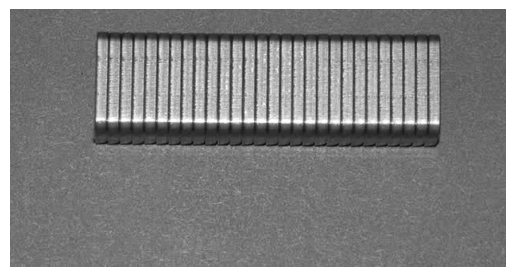

In [2]:
img = cv2.imread("./Image/Staple2.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.axis(False)
plt.show()

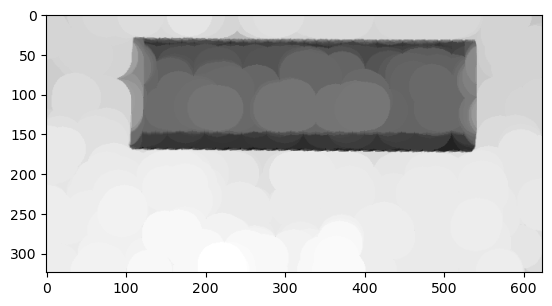

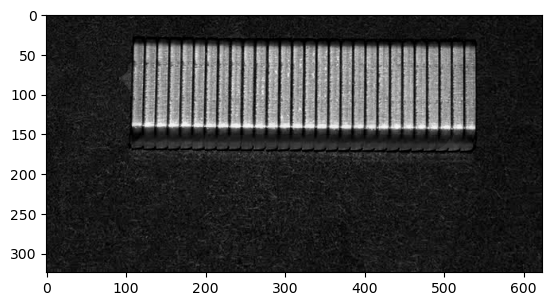

In [9]:
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize=(29, 29))
bg = cv2.morphologyEx(img, cv2.MORPH_OPEN, strel, iterations=2)
plt.imshow(bg, cmap="gray")
plt.show()

im2 = img - bg
plt.imshow(im2, cmap="gray")
plt.show()

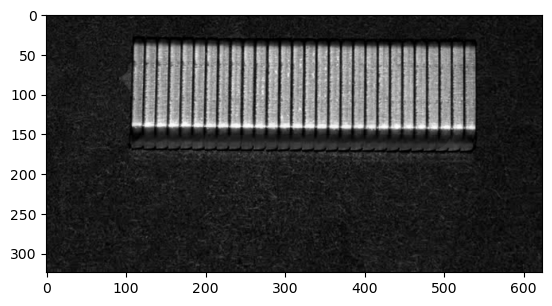

In [59]:
img2 = cv2.GaussianBlur(im2, (3, 3), sigmaX=0.5, sigmaY=0.5)
plt.imshow(img2, cmap="gray")

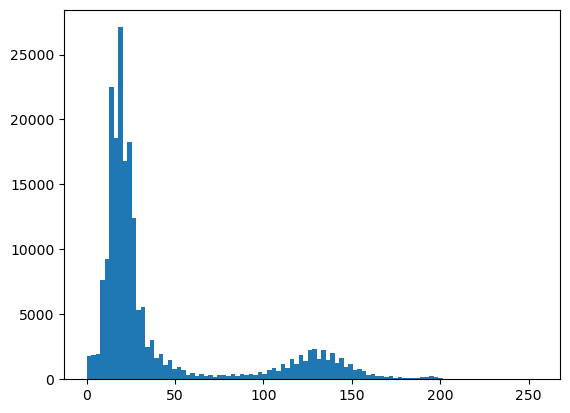

In [63]:
plt.hist(img2.flat, bins=100, range=(0,255))
plt.show()

Threshold:75.0


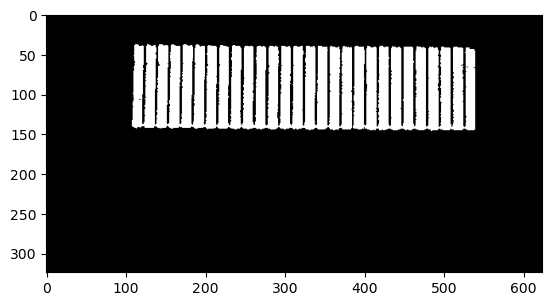

In [12]:
th, b_img = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"Threshold:{th}" )
plt.imshow(b_img,cmap='grey')
plt.show()

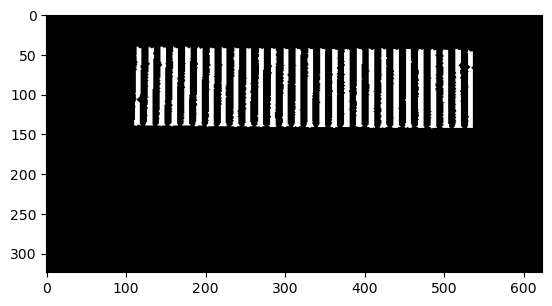

In [14]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(3, 3))
img_open = cv2.morphologyEx(b_img, op=cv2.MORPH_ERODE, kernel=kernel, iterations = 3)
plt.imshow(img_open, cmap="gray")

In [15]:
ret, labels = cv2.connectedComponents(img_open, connectivity=8)
print(ret - 1)

28


In [16]:
labels == 1

(324, 624)

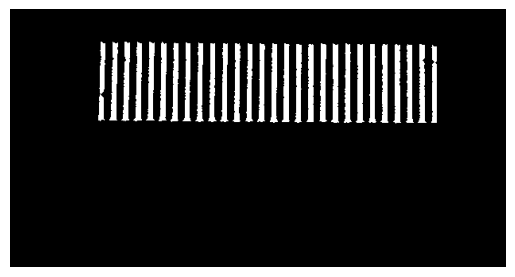

In [20]:
img_open_copy = img_open.copy()

img_open_copy[labels==0] = 0
plt.imshow(img_open_copy, cmap='gray')
plt.axis(False)
plt.show()

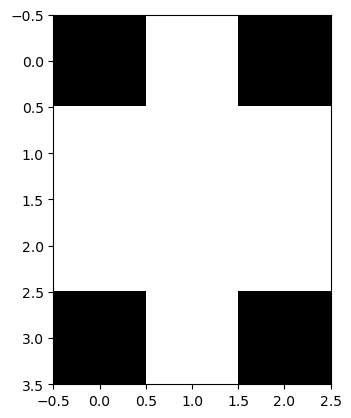

In [64]:
kernel = np.array([[0,1,0],
                    [1,1,1],
                    [1,1,1],
                    [0,1,0]]).astype(np.uint8)
plt.imshow(kernel, cmap='gray');

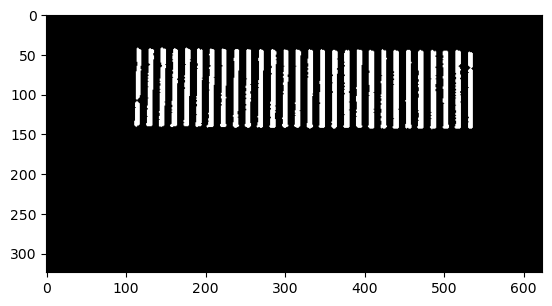

In [67]:
image_mask =  cv2.morphologyEx(img_open_copy, cv2.MORPH_OPEN, kernel,iterations =1 )
plt.imshow(image_mask,cmap='grey')

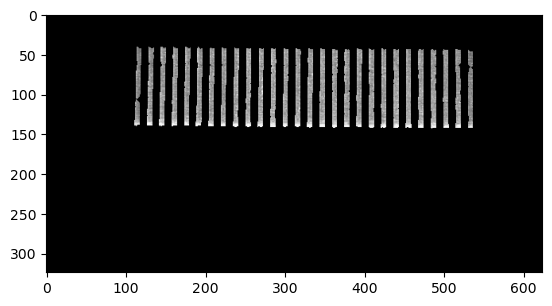

In [48]:
plt.imshow(cv2.bitwise_and(im2,im2,mask=image_mask),cmap='grey')